<a href="https://colab.research.google.com/github/Naidala/CNN_medical_imaging/blob/main/Task5_Ensemble2Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import itertools

#Plotting of the Matrix confusion
def plot_confusion_matrix(cm,
                          cell,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

  accuracy = np.trace(cm) / float(np.sum(cm))
  misclass = 1 - accuracy
  cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(8, 6))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()

  thresh = cm.max() / 1.5 if normalize else cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, "{:,}".format(cm[i, j]),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xticks(range(0,cell),)
  plt.yticks(range(0,cell),)
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
  plt.show()

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from google.colab import drive
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import copy

drive.mount("/content/drive/", force_remount=True)
out_path = "/content/drive/My Drive/CompIntProjects/FinalProject2019/numpy data/"

TensorFlow 1.x selected.
Mounted at /content/drive/


In [ ]:
  test_images = np.load(os.path.join(out_path,'public_test_tensor.npy'))
  test_labels = np.load(os.path.join(out_path,'public_test_labels.npy'))
  test_images = test_images.astype('float32') / 65535
  test_images = test_images.reshape((len(test_images), 150, 150, 1))
  test_images = test_images[1:len(test_images):2]
  test_labels = test_labels[1:len(test_labels):2]
  for i in range(0,len(test_labels)):
    if test_labels[i] > 0 and test_labels[i] < 3 :
      test_labels[i] = 0
    else :
      test_labels[i] = 1

## SCRATCH

In [ ]:
from tensorflow.keras.models import load_model
save_dir = "/content/drive/My Drive/CompIntProjects/2classes"
model_scratch = load_model(os.path.join(save_dir,"2classes_scratch.h5"))
test_loss, test_acc = model_scratch.evaluate(test_images, test_labels)
print('test_acc: ', test_acc)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
336/336 [==============================] - 7s 21ms/sample - loss: 0.9984 - acc: 0.8274
test_acc:  0.82738096


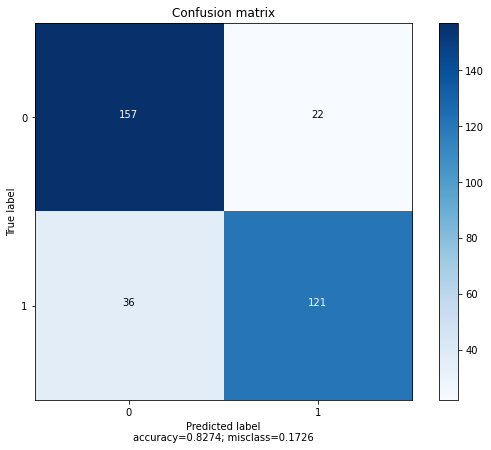

In [ ]:
pred = np.round(model_scratch.predict(test_images))
true = test_labels

cm = metrics.confusion_matrix(true,pred)
plot_confusion_matrix(cm,2)

## AUGMENTED

In [ ]:
from tensorflow.keras.models import load_model
save_dir = "/content/drive/My Drive/CompIntProjects/2classes"
model_aug = load_model(os.path.join(save_dir,"2classes_aug.h5"))
test_loss, test_acc = model_aug.evaluate(test_images, test_labels)
print('test_acc: ', test_acc)

336/336 [==============================] - 0s 426us/sample - loss: 0.3011 - acc: 0.8690
test_acc:  0.86904764


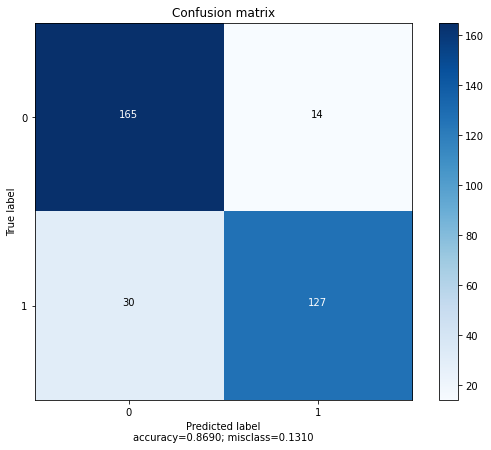

In [ ]:
pred = np.round(model_aug.predict(test_images))
true = test_labels

cm = metrics.confusion_matrix(true,pred)
plot_confusion_matrix(cm,2)

## PRE-TRAINED

In [ ]:
from tensorflow.keras.models import load_model
save_dir = "/content/drive/My Drive/CompIntProjects/2classes"
model_pre = load_model(os.path.join(save_dir,"2classes_pre_trained.h5"))

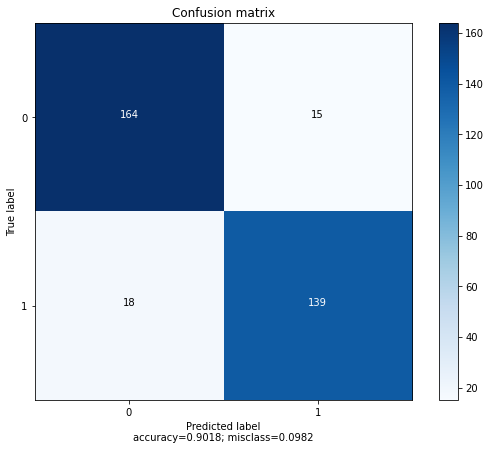

In [ ]:
test_images_pre = copy.deepcopy(test_images.repeat(repeats = 3, axis = 3))
pred = np.round(model_pre.predict(test_images_pre))
true = test_labels

cm = metrics.confusion_matrix(true,pred)
plot_confusion_matrix(cm,2)

# FINE-TUNED

In [ ]:
from tensorflow.keras.models import load_model
save_dir = "/content/drive/My Drive/CompIntProjects/2classes"
model_fine = load_model(os.path.join(save_dir,"2classes_fine.h5"))

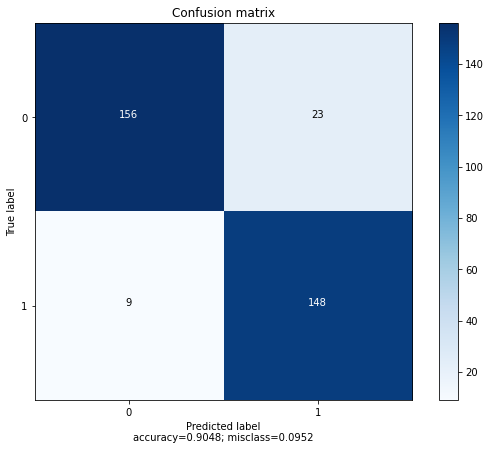

In [ ]:
test_images_fine = copy.deepcopy(test_images.repeat(repeats = 3, axis = 3))
pred = np.round(model_fine.predict(test_images_fine))
true = test_labels

cm = metrics.confusion_matrix(true,pred)
plot_confusion_matrix(cm,2)

# ENSEMBLE

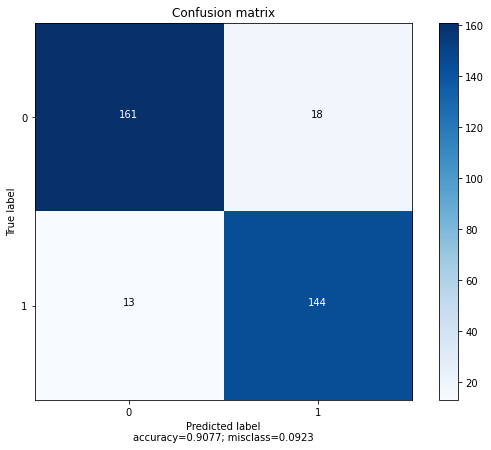

In [ ]:
preds_fine = model_fine.predict(test_images_fine)
preds_pre = model_pre.predict(test_images_pre)

final_preds = (preds_fine + preds_pre)/2
final_preds_new = np.round(final_preds)

cm = metrics.confusion_matrix(true,final_preds_new)
plot_confusion_matrix(cm,2)